In [23]:
import numpy as np
import matplotlib.pyplot as plt
import random as r
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten

In [9]:
x_train = np.loadtxt('input.csv',delimiter=',')
y_train= np.loadtxt('labels.csv',delimiter=',')

x_test= np.loadtxt('input_test.csv',delimiter=',')
y_test =np.loadtxt('labels_test.csv',delimiter=',')

In [10]:
x_train=x_train.reshape(len(x_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)
x_test=x_test.reshape(len(x_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)

In [35]:
x_train= x_train/255.0
y_train=y_train/255.0
x_test=x_test/255.0
y_test=y_test/255.0

In [11]:
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (2000, 100, 100, 3)
shape of y_train: (2000, 1)
shape of x_test: (400, 100, 100, 3)
shape of y_test: (400, 1)


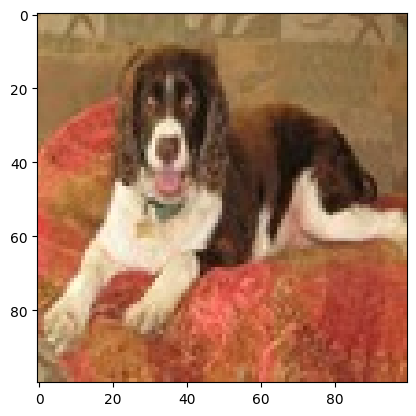

In [18]:
idx = r.randint(0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

In [24]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [25]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
model.fit(x_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 186ms/step - accuracy: 0.5052 - loss: 0.0998
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.5249 - loss: 0.0148
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.5131 - loss: 0.0142
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - accuracy: 0.4869 - loss: 0.0146
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.4956 - loss: 0.0142


In [27]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7916 - loss: 154.9431


[368.851806640625, 0.5]

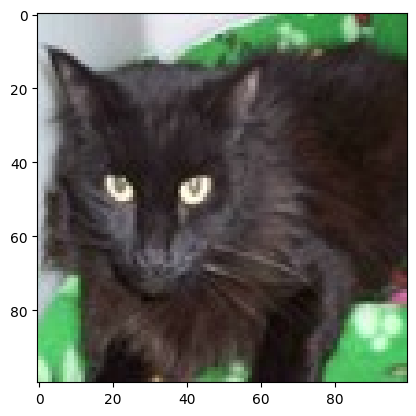

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
dog


In [45]:
idx2=r.randint(0, len(y_test))
plt.imshow(x_test[idx2,:])
plt.show()

y_pred= model.predict(x_test[idx2,:].reshape(1,100,100,3))
y_pred=y_pred > 0.5
if y_pred==0:
    pred="dog"
else:
    pred="cat"

print(pred)